# Examples

This example use randoms values for wind speed and direction(ws and wdnotebooks/windrose_sample_poitiers_csv.ipynb
variables). In situation, these variables are loaded with reals values
(1-D array), from a database or directly from a text file.
See [this notebook](https://github.com/python-windrose/windrose/blob/master/notebooks/windrose_sample_poitiers_csv.ipynb) for an example of real data.

In [1]:
import numpy as np

N = 500
ws = np.random.random(N) * 6
wd = np.random.random(N) * 360

## A stacked histogram with normed (displayed in percent) results.

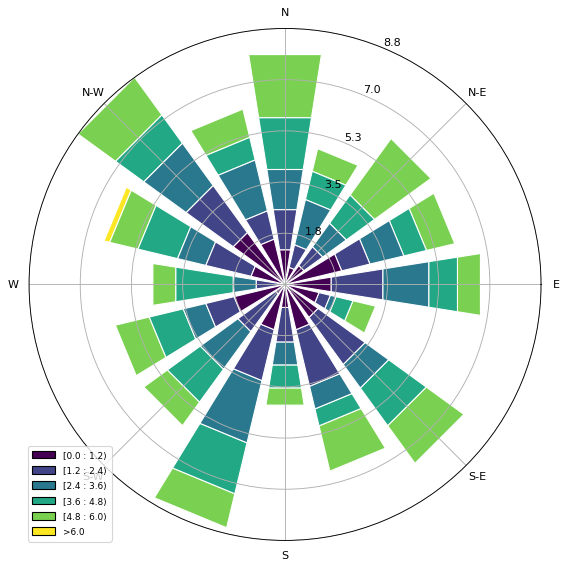

In [2]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor="white")
ax.set_legend();

## Another stacked histogram representation, not normed, with bins limits.

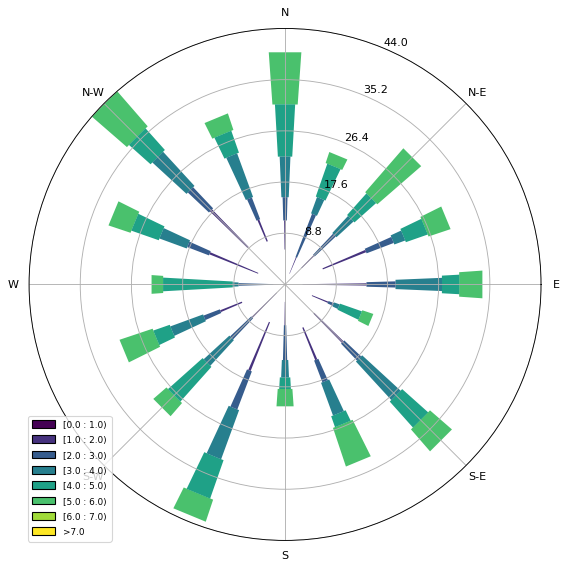

In [3]:
ax = WindroseAxes.from_ax()
ax.box(wd, ws, bins=np.arange(0, 8, 1))
ax.set_legend();

## A windrose in filled representation, with a controlled colormap.

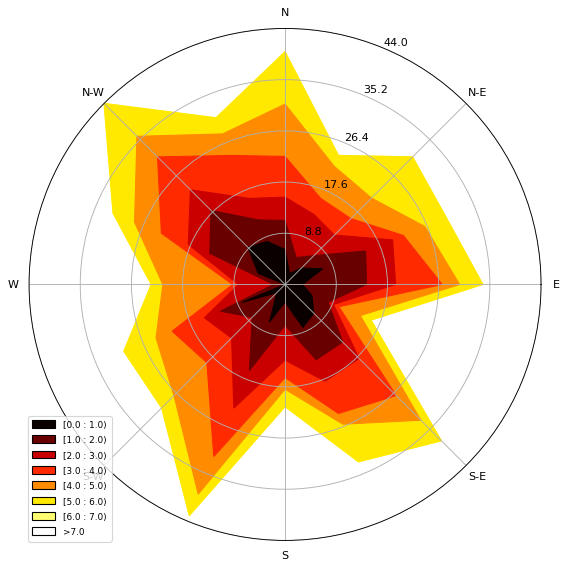

In [4]:
from matplotlib import cm

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend();

## Same as above, but with contours over each filled region...

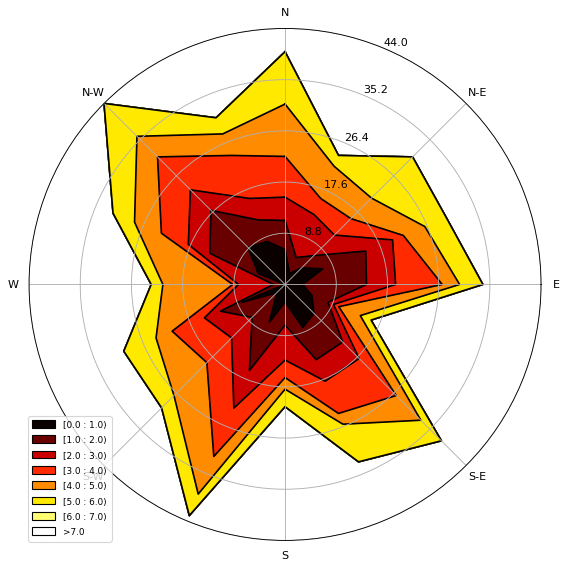

In [5]:
ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(wd, ws, bins=np.arange(0, 8, 1), colors="black")
ax.set_legend();

## ...or without filled regions.

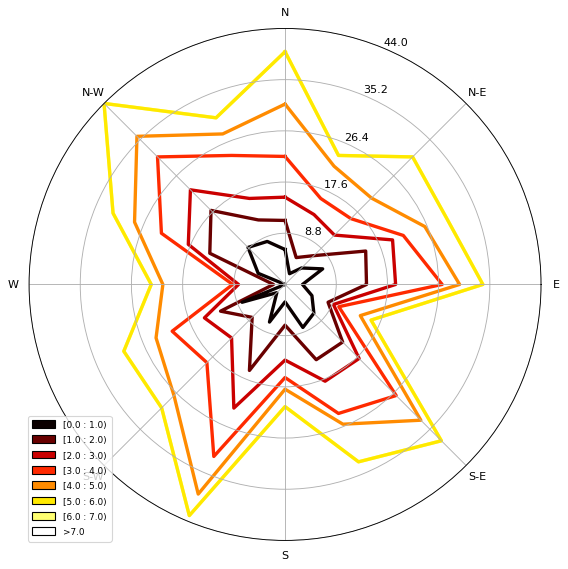

In [6]:
ax = WindroseAxes.from_ax()
ax.contour(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend();

After that, you can have a look at the computed values used to plot the
windrose with the ``ax._info`` dictionary : 

- ``ax._info['bins']`` :
  list of bins (limits) used for wind speeds. If not set in the call, bins
  will be set to 6 parts between wind speed min and max. 
- ``ax._info['dir']`` : list of directions "boundaries" used to compute the
  distribution by wind direction sector. This can be set by the nsector
  parameter (see below). 
- ``ax._info['table']`` : the resulting table of
  the computation. It's a 2D histogram, where each line represents a wind
  speed class, and each column represents a wind direction class.

So, to know the frequency of each wind direction, for all wind speeds, do:

In [7]:
ax.bar(wd, ws, normed=True, nsector=16)
table = ax._info["table"]
wd_freq = np.sum(table, axis=0)

and to have a graphical representation of this result:

[Text(0, 0, 'N'),
 Text(1, 0, ''),
 Text(2, 0, 'N-E'),
 Text(3, 0, ''),
 Text(4, 0, 'E'),
 Text(5, 0, ''),
 Text(6, 0, 'S-E'),
 Text(7, 0, ''),
 Text(8, 0, 'S'),
 Text(9, 0, ''),
 Text(10, 0, 'S-O'),
 Text(11, 0, ''),
 Text(12, 0, 'O'),
 Text(13, 0, ''),
 Text(14, 0, 'N-O'),
 Text(15, 0, '')]

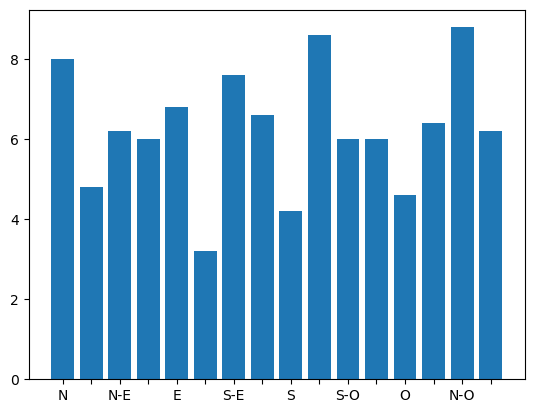

In [8]:
import matplotlib.pyplot as plt

direction = ax._info["dir"]
wd_freq = np.sum(table, axis=0)

plt.bar(np.arange(16), wd_freq, align="center")
xlabels = (
    "N", "",
    "N-E", "",
    "E", "",
    "S-E", "",
    "S", "",
    "S-O", "",
    "O", "",
    "N-O", "",
)
xticks = np.arange(16)
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xlabels)

In addition of all the standard pyplot parameters, you can pass special
parameters to control the windrose production. For the stacked histogram
windrose, calling help(ax.bar) will give :
``bar(self, direction, var, **kwargs)`` method of
``windrose.WindroseAxes`` instance Plot a windrose in bar mode. For each
var bins and for each sector, a colored bar will be draw on the axes.

Mandatory:

- ``direction`` : 1D array - directions the wind blows from, North centred
- ``var`` : 1D array - values of the variable to compute. Typically the wind speeds

Optional: 

- ``nsector`` : integer - number of sectors used to compute
  the windrose table. If not set, nsectors=16, then each sector will be
  360/16=22.5°, and the resulting computed table will be aligned with the
  cardinals points.
- ``bins`` : 1D array or integer - number of bins, or a
  sequence of bins variable. If not set, bins=6 between min(var) and
  max(var).
- ``blowto`` : bool. If True, the windrose will be pi rotated,
  to show where the wind blow to (useful for pollutant rose). 
- ``colors`` : string or tuple - one string color (``'k'`` or
  ``'black'``), in this case all bins will be plotted in this color; a
  tuple of matplotlib color args (string, float, rgb, etc), different
  levels will be plotted in different colors in the order specified. 
- ``cmap`` : a cm Colormap instance from ``matplotlib.cm``. - if
  ``cmap == None`` and ``colors == None``, a default Colormap is used. 
- ``edgecolor`` : string - The string color each edge bar will be plotted.
  Default : no edgecolor 
- ``opening`` : float - between 0.0 and 1.0, to
  control the space between each sector (1.0 for no space) 
- ``mean_values`` : Bool - specify wind speed statistics with
  direction=specific mean wind speeds. If this flag is specified, var is
  expected to be an array of mean wind speeds corresponding to each entry
  in ``direction``. These are used to generate a distribution of wind
  speeds assuming the distribution is Weibull with shape factor = 2. 
- ``weibull_factors`` : Bool - specify wind speed statistics with
  direction=specific weibull scale and shape factors. If this flag is
  specified, var is expected to be of the form [[7,2], ...., [7.5,1.9]]
  where var[i][0] is the weibull scale factor and var[i][1] is the shape
  factor

## Probability density function (pdf) and fitting Weibull distribution

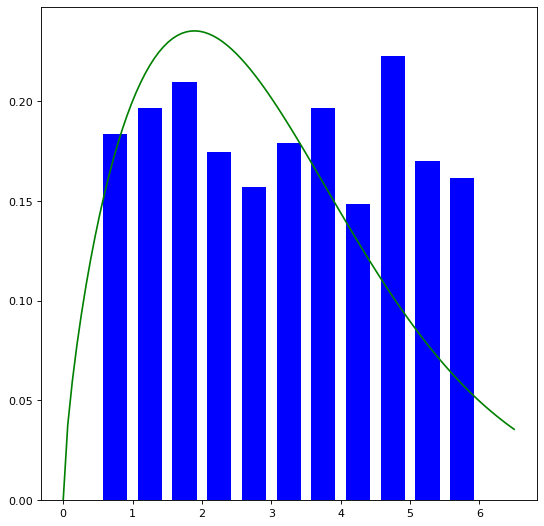

In [9]:
from windrose import WindAxes

ax = WindAxes.from_ax()
bins = np.arange(0, 6 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(ws, bins=bins)

Optimal parameters of Weibull distribution can be displayed using

In [10]:
print(params)

(1, 1.6627354318625502, 0, 3.2875667186875392)


## Overlay of a map

This example illustrate how to set an windrose axe on top of any other axes. Specifically,
overlaying a map is often useful.
It rely on matplotlib toolbox inset_axes utilities.

/home/runner/micromamba-root/envs/TEST/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


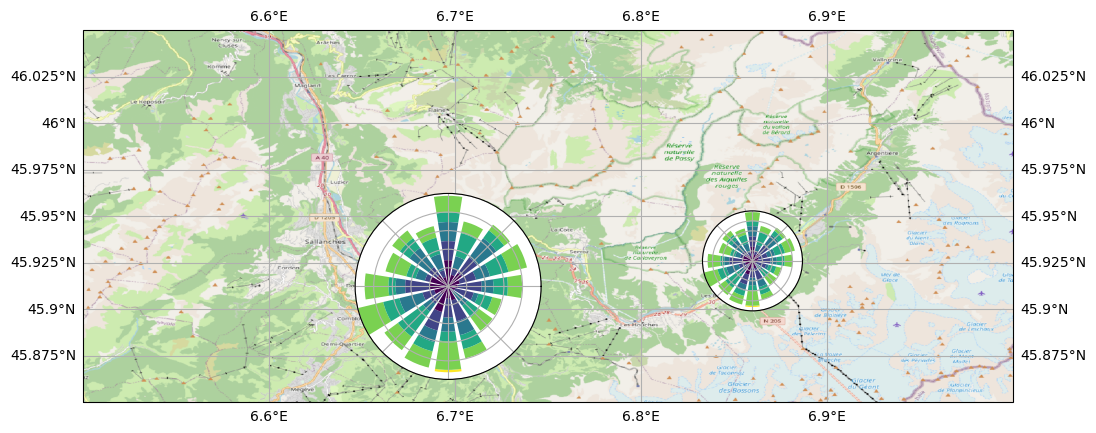

In [11]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import windrose

ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

minlon, maxlon, minlat, maxlat = (6.5, 7.0, 45.85, 46.05)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()

request = cimgt.OSM()
main_ax.add_image(request, 12)

# Coordinates of the station we were measuring windspeed
cham_lon, cham_lat = (6.8599, 45.9259)
passy_lon, passy_lat = (6.7, 45.9159)

# Inset axe it with a fixed size
wrax_cham = inset_axes(
    main_ax,
    width=1,  # size in inches
    height=1,  # size in inches
    loc="center",  # center bbox at given position
    bbox_to_anchor=(cham_lon, cham_lat),  # position of the axe
    bbox_transform=main_ax.transData,  # use data coordinate (not axe coordinate)
    axes_class=windrose.WindroseAxes,  # specify the class of the axe
)

# Inset axe with size relative to main axe
height_deg = 0.1
wrax_passy = inset_axes(
    main_ax,
    width="100%",  # size in % of bbox
    height="100%",  # size in % of bbox
    # loc="center",  # don"t know why, but this doesn"t work.
    # specify the center lon and lat of the plot, and size in degree
    bbox_to_anchor=(
        passy_lon - height_deg / 2,
        passy_lat - height_deg / 2,
        height_deg,
        height_deg,
    ),
    bbox_transform=main_ax.transData,
    axes_class=windrose.WindroseAxes,
)

wrax_cham.bar(wd, ws)
wrax_passy.bar(wd, ws)
for ax in [wrax_cham, wrax_passy]:
    ax.tick_params(labelleft=False, labelbottom=False)

## Functional API

Instead of using object oriented approach like previously shown, some
"shortcut" functions have been defined: ``wrbox``, ``wrbar``,
``wrcontour``, ``wrcontourf``, ``wrpdf``. See [unit tests](https://github.com/python-windrose/windrose/blob/master/tests/test_windrose.py).

## Pandas support

windrose not only supports Numpy arrays. It also supports also Pandas
DataFrame. ``plot_windrose`` function provides most of plotting features
previously shown.

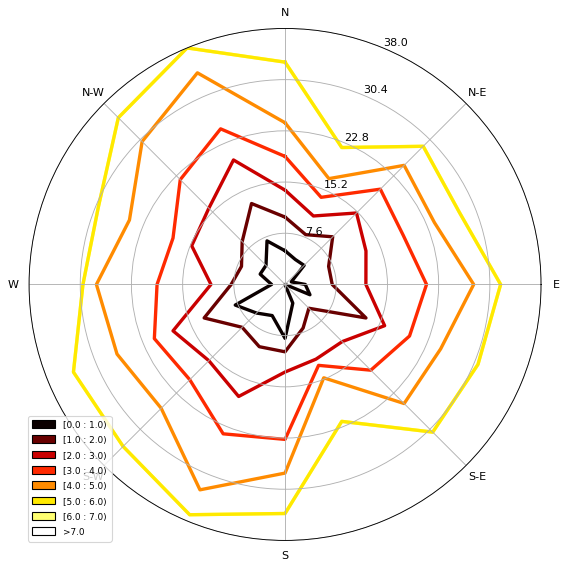

In [12]:
import pandas as pd

from windrose import plot_windrose

N = 500
ws = np.random.random(N) * 6
wd = np.random.random(N) * 360
df = pd.DataFrame({"speed": ws, "direction": wd})
plot_windrose(df, kind="contour", bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3);

Mandatory:

- ``df``: Pandas DataFrame with ``DateTimeIndex`` as index
  and at least 2 columns (``'speed'`` and ``'direction'``).

Optional: 

- ``kind`` : kind of plot (might be either, ``'contour'``, ``'contourf'``, ``'bar'``, ``'box'``, ``'pdf'``)
- ``var_name`` : name of var column name ; default value is ``VAR_DEFAULT='speed'``
- ``direction_name`` : name of direction column name ; default value is
  ``DIR_DEFAULT='direction'``
- ``clean_flag`` : cleanup data flag (remove
  data points with ``NaN``, ``var=0``) before plotting ; default value is
  ``True``.

## Video export


A video of plots can be exported. A playlist of videos is [available here](https://www.youtube.com/playlist?list=PLE9hIvV5BUzsQ4EPBDnJucgmmZ85D_b-W), see:

[![Video1](http://img.youtube.com/vi/0u2RxtGgEFo/0.jpg)](https://www.youtube.com/watch?v=0u2RxtGgEFo)

[![Video2](http://img.youtube.com/vi/3CWpjSEt0so/0.jpg)](https://www.youtube.com/watch?v=3CWpjSEt0so)

[![Video3](http://img.youtube.com/vi/UiGC-3aw9TM/0.jpg)](https://www.youtube.com/watch?v=UiGC-3aw9TM)

[Source code](https://github.com/python-windrose/windrose/blob/master/samples/example_animate.py).

This is just a sample for now. API for video need to be created.

Use:

```bash
$ python samples/example_animate.py --help
```

to display command line interface usage.